# High-Accuracy Motorized Telescope Mount using direct instanteous torque control (DITC)

## Core Components
1. **Microcontroller:** To implement the control algorithms like Direct Instantaneous Torque Control (DITC) and Space Vector Modulation (SVM).
   - Recommended: Teensy 4.1 (600 MHz, Cortex-M7 with FPU)
  
2. **Current Sensors:** For measuring motor phase currents and implementing feedback in control algorithms.
   - Recommended: ACS770 or ACS780 (Hall-effect based, high bandwidth)
  
3. **High-Resolution Encoder:** For precise position and speed feedback.
   - Recommended: AS5047P (14-bit, SPI interface)

4. **Motor Driver/Inverter:** To drive the BLDC motor based on control signals.
   - Recommended: DRV8305 (integrated current sensing) or VESC 6 Plus (complete motor controller solution)
  
5. **Isolation Circuitry:** For isolating high-voltage and low-voltage parts of your system.
   - Recommended: PC817 (low-speed) or ADuM1401 (high-speed)
  
6. **Power Supply:** To provide the necessary voltage and current to the system.
   - Recommended: LM2675 (simple 1A step-down) or MPM3695-25 (up to 16A, integrated solution)

## Optional Integrated Solution
- **TMC4671:** Combines current sensing, gate driving, and a dedicated motion controller. Reduces component count but may require a more complex setup.

## Control Scheme
1. **Control Algorithm:** The Teensy 4.1 runs the DITC algorithm with SVM for high-accuracy and low-RPM performance. The control logic takes inputs from current sensors and encoders.
  
2. **Current Loop:** ACS770/780 sensors measure the motor phase currents. The Teensy 4.1 uses this data to estimate the actual torque and flux.
  
3. **Position/Speed Loop:** The AS5047P provides high-resolution feedback on the rotor position and speed to fine-tune the applied voltage vectors.
  
4. **Voltage Vector Control:** The DRV8305 or VESC 6 Plus converts the PWM signals from the Teensy into the actual voltages and currents fed to the motor.
  
5. **Isolation:** PC817 or ADuM1401 isolators are used to separate the Teensy and other low-voltage components from the higher-voltage motor and driver circuits.
  
6. **Power Management:** The LM2675 or MPM3695-25 ensures that the whole system is powered appropriately, maintaining voltage and current levels within specified limits.

In [2]:
! pip install matplotlib networkx

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


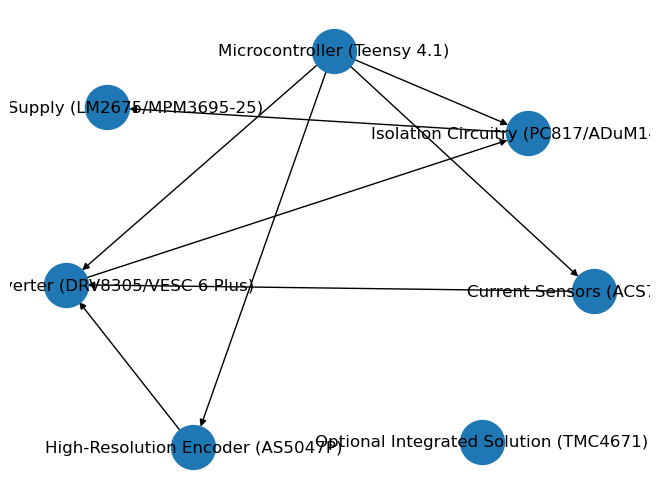

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the nodes (components)
nodes = [
    "Microcontroller (Teensy 4.1)",
    "Current Sensors (ACS770/780)",
    "High-Resolution Encoder (AS5047P)",
    "Motor Driver/Inverter (DRV8305/VESC 6 Plus)",
    "Isolation Circuitry (PC817/ADuM1401)",
    "Power Supply (LM2675/MPM3695-25)",
    "Optional Integrated Solution (TMC4671)"
]

# Define the edges (connections)
edges = [
    ("Microcontroller (Teensy 4.1)", "Current Sensors (ACS770/780)"),
    ("Microcontroller (Teensy 4.1)", "High-Resolution Encoder (AS5047P)"),
    ("Microcontroller (Teensy 4.1)", "Motor Driver/Inverter (DRV8305/VESC 6 Plus)"),
    ("Microcontroller (Teensy 4.1)", "Isolation Circuitry (PC817/ADuM1401)"),
    ("Current Sensors (ACS770/780)", "Motor Driver/Inverter (DRV8305/VESC 6 Plus)"),
    ("High-Resolution Encoder (AS5047P)", "Motor Driver/Inverter (DRV8305/VESC 6 Plus)"),
    ("Motor Driver/Inverter (DRV8305/VESC 6 Plus)", "Isolation Circuitry (PC817/ADuM1401)"),
    ("Isolation Circuitry (PC817/ADuM1401)", "Power Supply (LM2675/MPM3695-25)")
]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, seed=42, k=10)
nx.draw(G, pos, with_labels=True, node_size=1000)
plt.show()